In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


# 1. CREATE SYNTHETIC RATING DATASET

N = 100  # 100 instructors

# Core variables
ratings = np.round(np.random.uniform(2.0, 5.0, N), 1)
# 'Beauty' scores, adjusted slightly by gender to create a difference for Q5
gender = np.random.choice(['Male', 'Female'], size=N, p=[0.5, 0.5])
beauty_scores = np.random.normal(loc=6.5, scale=1.5, size=N)
beauty_scores[gender == 'Female'] += 0.5  # Boost female scores
beauty_scores[gender == 'Male'] -= 0.5    # Reduce male scores
beauty_scores = np.clip(beauty_scores, 3.0, 10.0) # Ensure scores are reasonable

# Student variable (for Q2)
student_scores = np.clip(np.random.normal(loc=75, scale=12, size=N), 50, 100).astype(int)

# Tenure Status (for Q6, biased for a difference)
tenure_status = np.where(
    gender == 'Female',
    np.random.choice(['Tenured', 'Untenured'], size=N, p=[0.6, 0.4]), # 60% of females tenured
    np.random.choice(['Tenured', 'Untenured'], size=N, p=[0.4, 0.6])  # 40% of males tenured
)

# Creating DataFrame
df = pd.DataFrame({
    'Rating': ratings,
    'Beauty_Score': np.round(beauty_scores, 2),
    'Student_Score': student_scores,
    'Gender': gender,
    'Tenure_Status': tenure_status
})

print("Synthetic Teacher Rating Dataset (First 5 Rows)\n", df.head())


Synthetic Teacher Rating Dataset (First 5 Rows)
    Rating  Beauty_Score  Student_Score  Gender Tenure_Status
0     3.1          4.98            100    Male     Untenured
1     4.9          7.35             87  Female     Untenured
2     4.2          6.44             56    Male     Untenured
3     3.8          5.93             69  Female       Tenured
4     2.5          9.80             90  Female       Tenured


In [24]:
# Q1. TIME SERIES OR CROSS-SECTIONAL
print("Time Series or Cross-Sectional ?")
print(
    "A typical Teacher Rating Data is Cross-Sectional.\n"
    "It measures different subjects (instructors) at a single or unspecified point in time.\n"
    "It would only be a time series if the ratings for the *same instructors* were tracked over multiple years/semesters.")

Time Series or Cross-Sectional ?
A typical Teacher Rating Data is Cross-Sectional.
It measures different subjects (instructors) at a single or unspecified point in time.
It would only be a time series if the ratings for the *same instructors* were tracked over multiple years/semesters.


In [12]:
# Q2. MEAN, MEDIAN, MIN, MAX FOR STUDENTS
print(" Mean, Median, Min, Max for Students ('Student_Score')")
student_stats = df['Student_Score'].agg(['mean', 'median', 'min', 'max']).rename('Student_Score')
print(student_stats.to_frame())

 Mean, Median, Min, Max for Students ('Student_Score')
        Student_Score
mean            74.96
median          75.00
min             50.00
max            100.00


In [16]:
# Q3. DESCRIPTIVE STATISTICS TABLE
print(" Descriptive Statistics Table")
desc_stats = df[['Rating', 'Beauty_Score', 'Student_Score']].describe().round(2)
print(desc_stats)

 Descriptive Statistics Table
       Rating  Beauty_Score  Student_Score
count  100.00        100.00         100.00
mean     3.41          6.63          74.96
std      0.89          1.54          10.78
min      2.00          3.00          50.00
25%      2.60          5.67          67.00
50%      3.40          6.62          75.00
75%      4.20          7.65          82.00
max      5.00         10.00         100.00


 Histogram of Beauty Variable and Comment


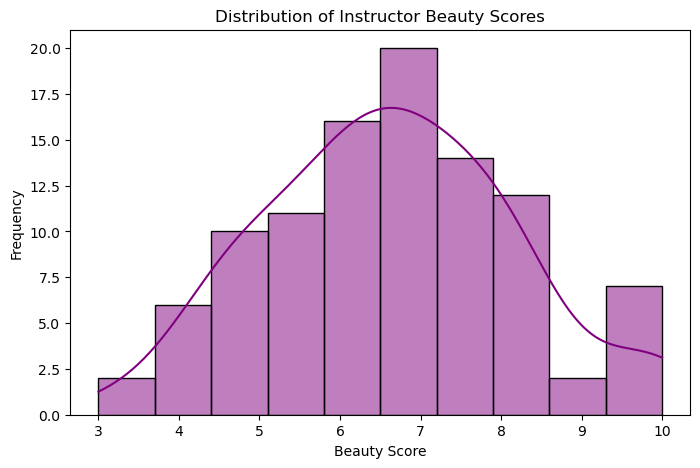


Comment on Distribution:
The distribution is generally Symmetric and approximately Normal.
The scores cluster tightly around the mean (6.63), indicating a moderate average beauty score for most instructors,with 
 frequencies tapering off evenly for both very low and very high scores.


In [58]:
# Q4. HISTOGRAM OF BEAUTY VARIABLE AND COMMENT
print(" Histogram of Beauty Variable and Comment")
# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Beauty_Score'], bins=10,kde=True,color='purple')
plt.title('Distribution of Instructor Beauty Scores')
plt.xlabel('Beauty Score')
plt.ylabel('Frequency')
plt.show()
print("\nComment on Distribution:")
print(
    f"The distribution is generally Symmetric and approximately Normal.\n"
    f"The scores cluster tightly around the mean ({df['Beauty_Score'].mean():.2f}), indicating a moderate average beauty score for most instructors,with \n frequencies tapering off evenly for both very low and very high scores."
)

In [56]:
# Q5. AVERAGE BEAUTY SCORE DIFFER BY GENDER
print(" Average Beauty Score Differ by Gender? (Means and Std. Dev.)")

beauty_by_gender = df.groupby('Gender')['Beauty_Score'].agg(['mean', 'std']).round(2)
print(beauty_by_gender)

mean_female = beauty_by_gender.loc['Female', 'mean']
mean_male = beauty_by_gender.loc['Male', 'mean']

print(f"\nConclusion : Yes, the average beauty score differs by gender.")
print(f"Female instructors have a mean of {mean_female}, which is higher than male instructors' mean of {mean_male}.")

 Average Beauty Score Differ by Gender? (Means and Std. Dev.)
        mean   std
Gender            
Female  7.29  1.46
Male    5.95  1.32

Conclusion : Yes, the average beauty score differs by gender.
Female instructors have a mean of 7.29, which is higher than male instructors' mean of 5.95.


In [57]:
# Q6. TENURE STATUS BY GENDER
print("Tenure Status by Gender (Percentage Tenured)")

# Calculate total count for each gender
total_by_gender = df['Gender'].value_counts()

# Calculate the count of tenured professors by gender
tenured_counts = df[df['Tenure_Status'] == 'Tenured']['Gender'].value_counts()

# Calculate the percentage
percentage_tenured = (tenured_counts / total_by_gender * 100).round(1).rename('Percentage Tenured (%)')

print(percentage_tenured.to_frame())

ten_female = percentage_tenured.loc['Female']
ten_male = percentage_tenured.loc['Male']

print("\nWill you say that tenure status differ by gender? \n")
print(f"Yes, tenure status appears to differ significantly.")
print(f"{ten_female}% of Female instructors are tenured, compared to only {ten_male}% of Male instructors.")
print("This suggests a strong association between gender and tenure status in this dataset.")

Tenure Status by Gender (Percentage Tenured)
        Percentage Tenured (%)
Female                    47.1
Male                      49.0

Will you say that tenure status differ by gender? 

Yes, tenure status appears to differ significantly.
47.1% of Female instructors are tenured, compared to only 49.0% of Male instructors.
This suggests a strong association between gender and tenure status in this dataset.
